<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/3.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85%20%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%206.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_K_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *K* ближайших соседей

## [Ссылка на код с пары](https://colab.research.google.com/drive/1VCRO7GkMyCvmQIy1rzWpK1Wtueya1IFo?usp=sharing)

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [3]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [161]:
from sklearn.model_selection import train_test_split

# Разбиваем данные на обучение (70%) и тест (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape,  X_test.shape

((105, 4), (45, 4))

#### 1.2. Обучите модель KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем модель KNN с количеством соседей, например, 3
knn = KNeighborsClassifier(n_neighbors=3)

# Обучаем модель на обучающем наборе
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

#### 1.3. Проверьте качество работы модели

In [29]:
# Прогнозируем классы для тестовых данных
y_pred = knn.predict(X_test)

# Оцениваем производительность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_pred)
print("Точность модели KNN:", accuracy)


Точность модели KNN: 1.0


#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

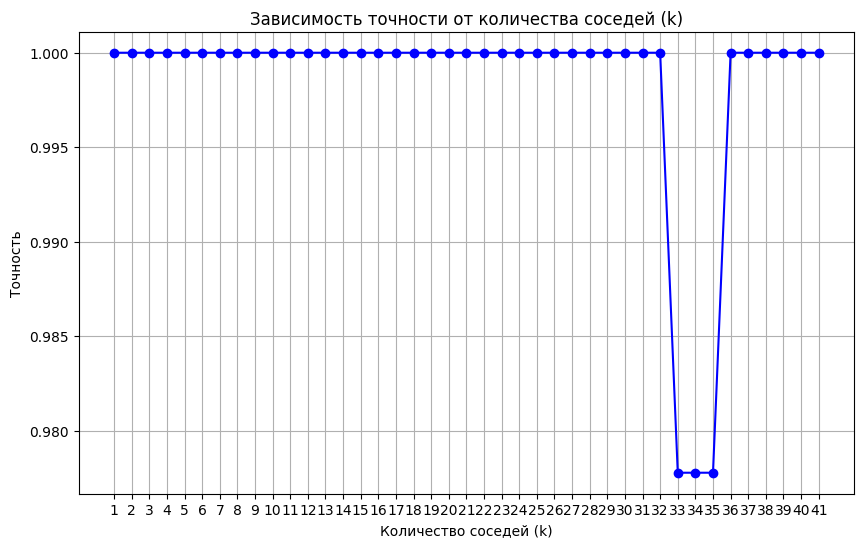

Наилучшее значение k: 1
Максимальная точность: 1.00


In [44]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Создаем таблицу для сохранения результатов
results = pd.DataFrame(columns=['k', 'Точность'])

# Перебираем разное количество соседей
for k in range(1, 42):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results = pd.concat([results, pd.DataFrame({'k': [k], 'Точность': [accuracy]})], ignore_index=True)

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(results['k'], results['Точность'], marker='o', linestyle='-', color='b')
plt.title('Зависимость точности от количества соседей (k)')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.xticks(range(1, 42))
plt.grid(True)
plt.show()

# Находим оптимальное значение k
best_k = results.loc[results['Точность'].idxmax()]['k']
best_accuracy = results['Точность'].max()

print(f"Наилучшее значение k: {best_k}")
print(f"Максимальная точность: {best_accuracy:.2f}")


### 2. KNN рукописный

In [55]:
#метрика минковского
from sklearn.metrics import pairwise_distances

# Создаем две точки
point1 = [3, 0, 5]
point2 = [1, 4, 3]

# Задаем степень p (в данном случае, пусть p=2 для евклидова расстояния)
p = 2

for p in range(-2, 10):
    distance = pairwise_distances([point1], [point2], metric='minkowski', p=p)
    print(f'Расстояние Минковского (p={p}): {distance[0][0]}')

Расстояние Минковского (p=-2): 1.3333333333333333
Расстояние Минковского (p=-1): 0.8
Расстояние Минковского (p=0): inf
Расстояние Минковского (p=1): 8.0
Расстояние Минковского (p=2): 4.898979485566356
Расстояние Минковского (p=3): 4.308869380063767
Расстояние Минковского (p=4): 4.119534287814235
Расстояние Минковского (p=5): 4.048794916999771
Расстояние Минковского (p=6): 4.020567134433743
Расстояние Минковского (p=7): 4.008869353831554
Расстояние Минковского (p=8): 4.003892963388282
Расстояние Минковского (p=9): 4.001733104421577


#### 2.1. Возьмите два случайных тестовых объектов

In [169]:
import numpy as np 

# Генерируем два случайных индекса из X_test
random_indices = np.random.choice(len(X_test), size=2, replace=False)

# Извлекаем соответствующие объекты из X_test
# Извлекаем соответствующие объекты из X_test
random_objects = X_test.iloc[random_indices]

# Исключаем строку заголовка (header)
random_objects = random_objects.values


#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [170]:
random_objects

array([[5.8, 2.7, 5.1, 1.9],
       [5. , 3.4, 1.6, 0.4]])

In [171]:
distances = pairwise_distances(X_train, random_objects, metric='minkowski', p=2)
distances

array([[1.7175564 , 2.45356883],
       [0.64807407, 3.93827373],
       [0.83066239, 4.38406204],
       [1.21243557, 3.4       ],
       [2.03224014, 5.4350713 ],
       [1.1045361 , 2.88270706],
       [2.37065392, 5.9       ],
       [0.80622577, 3.18433667],
       [4.20832508, 0.31622777],
       [2.48797106, 6.01830541],
       [1.3453624 , 2.78208555],
       [4.17492515, 0.34641016],
       [4.27551167, 0.33166248],
       [3.76696164, 0.50990195],
       [2.12132034, 2.43515913],
       [0.54772256, 3.87685439],
       [3.82361086, 0.41231056],
       [3.98371686, 0.4472136 ],
       [3.79077828, 0.2       ],
       [1.1       , 2.90172363],
       [4.1024383 , 0.24494897],
       [1.18321596, 2.83725219],
       [2.73313007, 6.05805249],
       [4.27434205, 0.52915026],
       [1.09544512, 3.12889757],
       [0.26457513, 3.92683078],
       [4.34971263, 0.98488578],
       [0.47958315, 3.65513338],
       [0.        , 3.95347948],
       [1.51986842, 2.92574777],
       [0.

#### 2.3. Выберите топ $k$ соседей для каждого объекта

In [172]:
import numpy as np

# Задаем количество ближайших соседей, которых мы хотим выбрать (например, k=3)
k = 3

# Инициализируем список для хранения индексов ближайших соседей для каждого объекта
top_k_neighbors = []

# Перебираем каждый объект из random_objects
for i in range(len(random_objects)):
    # Используем argsort для получения индексов соседей, отсортированных по возрастанию расстояний
    neighbor_indices = np.argsort(distances[:, i])
    
    # Выбираем первые k индексов, исключая сам объект
    k_neighbors = neighbor_indices[1:k+1]  # Исключаем сам объект (его индекс 0)
    
    # Добавляем индексы ближайших соседей в список top_k_neighbors
    top_k_neighbors.append(k_neighbors)

# В top_k_neighbors теперь будут индексы ближайших k соседей для каждого объекта из random_objects

# Выводим значения ближайших соседей для каждого объекта из random_objects
for i, neighbors in enumerate(top_k_neighbors):
    print(f"Ближайшие соседи для объекта {i + 1}:")
    for j, neighbor_index in enumerate(neighbors):
        neighbor_values = X_train.iloc[neighbor_index]
        print(f"Сосед {j + 1}: {neighbor_values}")
    print()

Ближайшие соседи для объекта 1:
Сосед 1: sepal length (cm)    5.7
sepal width (cm)     2.5
petal length (cm)    5.0
petal width (cm)     2.0
Name: 113, dtype: float64
Сосед 2: sepal length (cm)    5.6
sepal width (cm)     2.8
petal length (cm)    4.9
petal width (cm)     2.0
Name: 121, dtype: float64
Сосед 3: sepal length (cm)    5.9
sepal width (cm)     3.0
petal length (cm)    5.1
petal width (cm)     1.8
Name: 149, dtype: float64

Ближайшие соседи для объекта 2:
Сосед 1: sepal length (cm)    5.0
sepal width (cm)     3.5
petal length (cm)    1.6
petal width (cm)     0.6
Name: 43, dtype: float64
Сосед 2: sepal length (cm)    5.0
sepal width (cm)     3.4
petal length (cm)    1.5
petal width (cm)     0.2
Name: 7, dtype: float64
Сосед 3: sepal length (cm)    5.1
sepal width (cm)     3.4
petal length (cm)    1.5
petal width (cm)     0.2
Name: 39, dtype: float64



#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях

C:\Users\Evgenie\AppData\Local\Temp\ipykernel_26372\2431885255.py:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
C:\Users\Evgenie\AppData\Local\Temp\ipykernel_26372\2431885255.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train.iloc[neighbor_indices]['sepal length (cm)'], X_train.iloc[neighbor_indices]['petal width (cm)'],


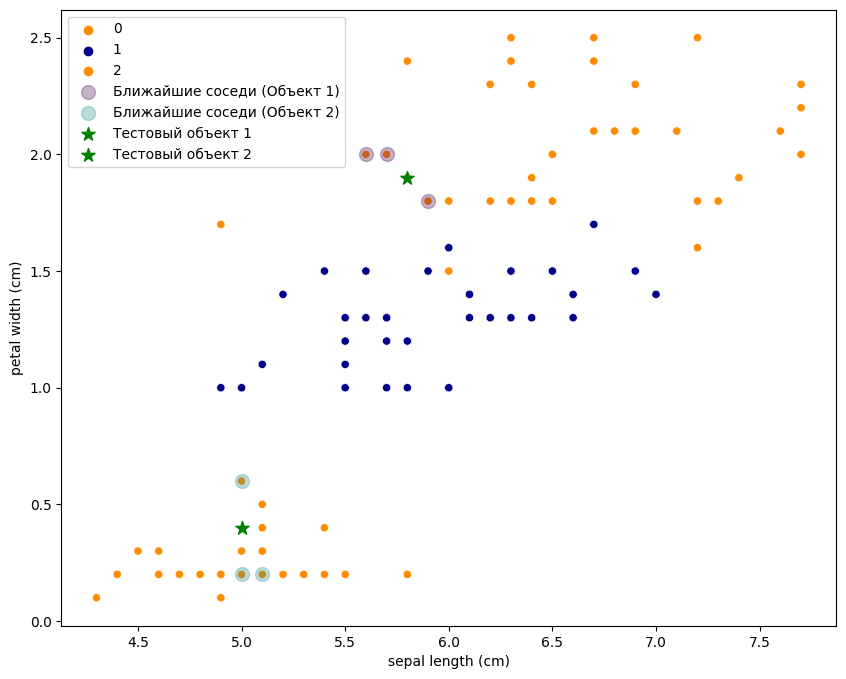

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем цветовые карты
cmap_bold = ["darkorange", "darkblue"]

# Создаем график
plt.figure(figsize=(10, 8))

# Рисуем точки обучающего набора данных, предполагая, что первые два признака - это X и Y координаты
sns.scatterplot(
    x=X_train['sepal length (cm)'],
    y=X_train['petal width (cm)'],
    hue=y_train,
    palette=cmap_bold
)

# Определяем индексы ближайших соседей для объектов из random_objects
nearest_neighbors_indices = top_k_neighbors

# Рисуем ближайших соседей для каждого объекта из random_objects
for i, neighbor_indices in enumerate(nearest_neighbors_indices):
    # Выбираем уникальный цвет для каждого объекта из random_objects
    color = plt.cm.viridis(i / len(random_objects))  # Используем colormap для выбора цвета
    plt.scatter(X_train.iloc[neighbor_indices]['sepal length (cm)'], X_train.iloc[neighbor_indices]['petal width (cm)'],
                c=color, alpha=0.3, marker='o', s=100, label=f'Ближайшие соседи (Объект {i + 1})')

for i in range(len(random_objects)):
    plt.scatter(random_objects[i, 0], random_objects[i, 3],
                c='g', marker='*', s=100, label=f'Тестовый объект {i + 1}')


plt.legend()
plt.show()



## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### KNN из sklearn

#### 3.1. Разбейте данные на обучение и тест

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape,  X_test.shape


((14448, 8), (6192, 8))

Затем нормализуйте данные:

In [4]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test[X_train.columns]), columns=X_train.columns)

#### 3.2. Обучите модель KNN


In [151]:
from sklearn.neighbors import KNeighborsRegressor

# Создайте модель KNN с заданным количеством соседей (например, n_neighbors=5)
knn = KNeighborsRegressor(n_neighbors=5)

# Обучаем модель на обучающем наборе
knn.fit(X_train, y_train)

KNeighborsRegressor()

#### 3.3. Проверьте качество работы модели

In [153]:
from sklearn.metrics import mean_squared_error, r2_score

# Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Рассчитайте MSE и R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратическая ошибка: {mse}")
print(f"R^2 (Коэффициент детерминации): {r2}") 


Среднеквадратическая ошибка: 0.4015197569508185
R^2 (Коэффициент детерминации): 0.6940895332946582


#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

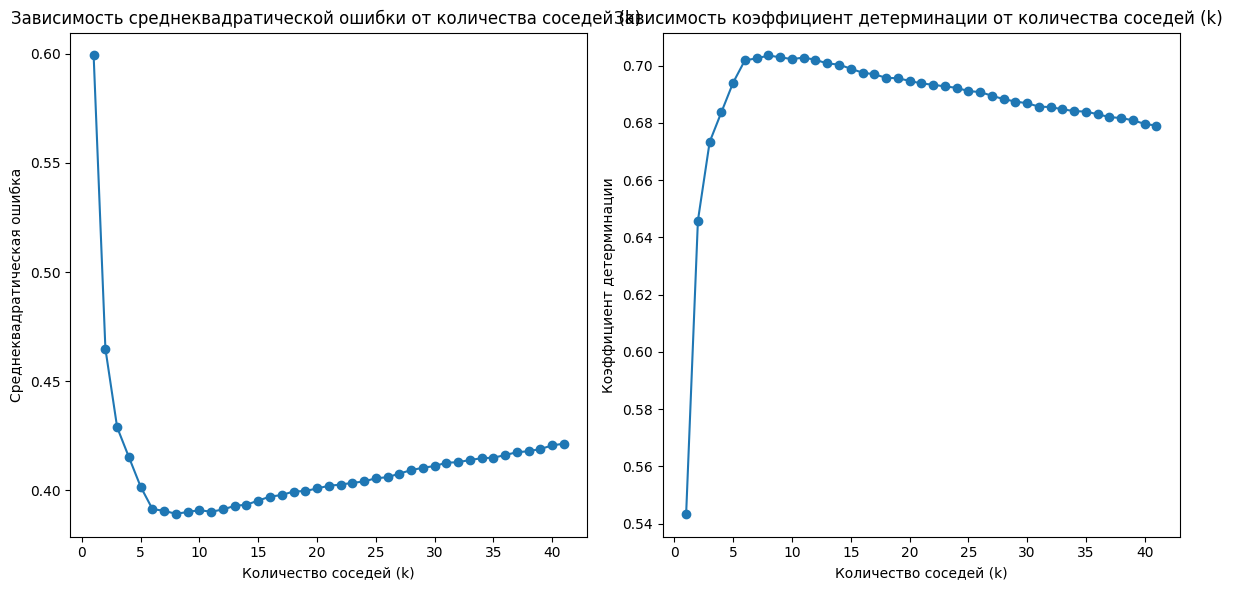

Оптимальное значение k по MSE: 8 (MSE=0.38911639878164667)
Оптимальное значение k по R^2: 8 (R^2=0.7035394221744964)


In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем таблицу для сохранения результатов
results = pd.DataFrame(columns=['k', 'Среднеквадратическая ошибка', 'Коэффициент детерминации'])

# Перебираем разное количество соседей
for k in range(1, 42):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results = pd.concat([results, pd.DataFrame({'k': [k], 'Среднеквадратическая ошибка': [mse], 'Коэффициент детерминации':[r2] })], ignore_index=True)

# Постройте графики для среднеквадратической ошибки и коэффициента детерминации
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(results['k'], results['Среднеквадратическая ошибка'], marker='o')
plt.title('Зависимость среднеквадратической ошибки от количества соседей (k) ')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Среднеквадратическая ошибка')

plt.subplot(1, 2, 2)
plt.plot(results['k'], results['Коэффициент детерминации'], marker='o')
plt.title('Зависимость коэффициент детерминации от количества соседей (k) ')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Коэффициент детерминации')

plt.tight_layout()
plt.show()

# Найдем значение k, при котором MSE минимальна
min_mse_idx = results['Среднеквадратическая ошибка'].idxmin()
optimal_k_mse = results.loc[min_mse_idx]['k']
min_mse = results.loc[min_mse_idx]['Среднеквадратическая ошибка']

# Найдем значение k, при котором R^2 максимальна
max_r2_idx = results['Коэффициент детерминации'].idxmax()
optimal_k_r2 = results.loc[max_r2_idx]['k']
max_r2 = results.loc[max_r2_idx]['Коэффициент детерминации']

print(f"Оптимальное значение k по MSE: {optimal_k_mse} (MSE={min_mse})")
print(f"Оптимальное значение k по R^2: {optimal_k_r2} (R^2={max_r2})")

### 4. KNN рукописный

#### 4.1. Возьмите два случайных тестовых объектов

In [8]:
import numpy as np

random_objects = X_test.sample(n=2)

random_objects



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
13610,4.4435,35.0,6.191837,1.048980,658.0,2.685714,34.14,-117.27
10193,5.1970,36.0,5.890173,0.991329,1066.0,3.080925,33.86,-117.95


#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [9]:
import numpy as np
import pandas as pd

distances = pd.DataFrame({
    'object_idx': pd.Series(dtype='int8'),
    'train_idx': pd.Series(dtype='int8'),
    'dst': pd.Series(dtype='float')
})

for test_idx, test_row in random_objects.iterrows():
    for i, train_dot in X_train.iterrows(): 
        distances.loc[len(distances)+1] = [test_idx, i, np.linalg.norm(test_row.values - train_dot.values, ord=2)]

distances['object_idx'] = distances['object_idx'].astype('int')
distances['train_idx'] = distances['train_idx'].astype('int')
distances.sort_values(['object_idx', 'dst'], ascending=True).head(10)

,object_idx,train_idx,dst
21604,10193,3880,2.206923
27978,10193,11302,2.537193
21196,10193,14457,2.979910
27037,10193,3683,3.052223
26675,10193,5251,3.280498
28620,10193,7022,3.433538
28073,10193,9111,3.633568
16151,10193,10788,3.733028
24570,10193,7331,3.919152
27367,10193,6368,4.019515


#### 4.3. Выберите топ $k$ соседей для каждого объекта

In [10]:
for test_idx, test_row in random_objects.iterrows():
    print(distances[distances['object_idx']==test_idx].sort_values(['dst']).head(10))

       object_idx  train_idx       dst
4307        13610       6217  1.720010
14444       13610      11284  2.110971
11692       13610      10213  3.356286
6896        13610      10643  3.721065
12307       13610       5946  4.191368
14432       13610       5051  4.378944
5594        13610       7520  4.569107
6411        13610       5188  4.683240
1810        13610       8575  5.009698
2893        13610      11304  5.519244
       object_idx  train_idx       dst
21604       10193       3880  2.206923
27978       10193      11302  2.537193
21196       10193      14457  2.979910
27037       10193       3683  3.052223
26675       10193       5251  3.280498
28620       10193       7022  3.433538
28073       10193       9111  3.633568
16151       10193      10788  3.733028
24570       10193       7331  3.919152
27367       10193       6368  4.019515


#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [11]:
nearest_neigbors_idxs = pd.Series(dtype='int')
test_points_X = []
test_points_Y = []
for test_idx, test_row in random_objects.iterrows():
    test_points_X.append(X_test.loc[test_idx].values[0])
    test_points_Y.append(X_test.loc[test_idx].values[1])
    nearest_neigbors_idxs = pd.concat(
        [nearest_neigbors_idxs, distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(3)['train_idx']])
nearest_neigbors_idxs = nearest_neigbors_idxs.values.astype(dtype='int')

#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов

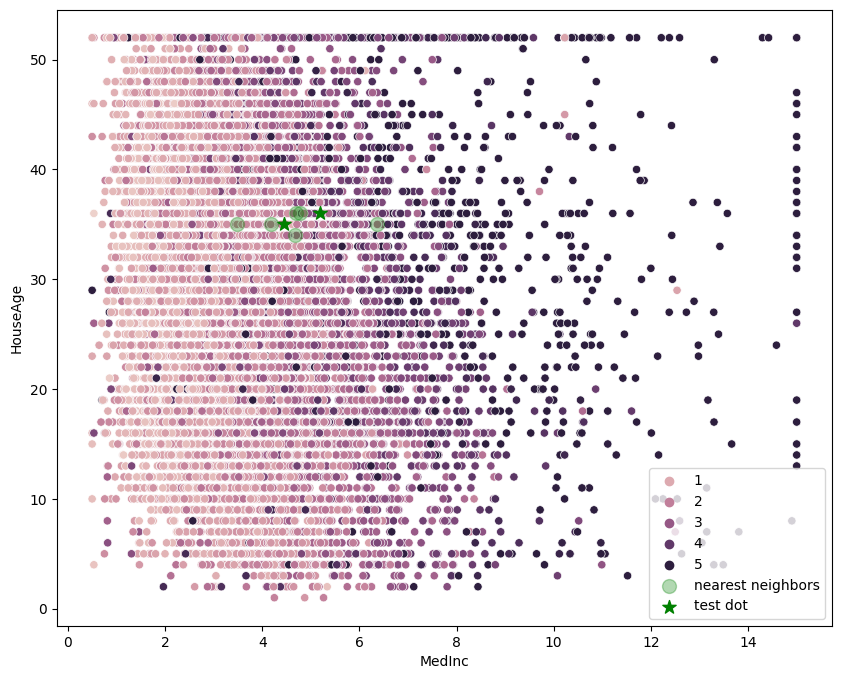

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ["darkorange", "darkblue"]



plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
)

plt.scatter(X_train.iloc[:,0].loc[nearest_neigbors_idxs], X_train.iloc[:,1].loc[nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(test_points_X, test_points_Y, c='g',
            marker='*', s=100, label='test dot')
plt.legend()


In [13]:
import statistics

for test_idx, test_row in random_objects.iterrows():
    idx = X_test.index.to_list().index(test_idx)
    real_value = y_test[idx]
    prdicted_values = []
    neigbors = distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(3)['train_idx']
    for train_idx in neigbors:
        prdicted_values.append(y_train[X_train.index.to_list().index(train_idx)])
    print('Real value:', real_value,'–', 'Predicted value:', statistics.mode(prdicted_values))

Real value: 0.976 – Predicted value: 1.917
Real value: 1.957 – Predicted value: 2.236


Предсказания отклоняются от истины, но не так сильно(?), они довольно близки.

# Weighted KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [14]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))

In [23]:
# Выбираем только два признака: "sepal length (cm)" и "petal width (cm)"
X_selected = X[['sepal length (cm)', 'petal width (cm)']]

# Выводим первые несколько строк нового DataFrame
X_selected.head()


,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


### Визуализируйте ваши данные на графике

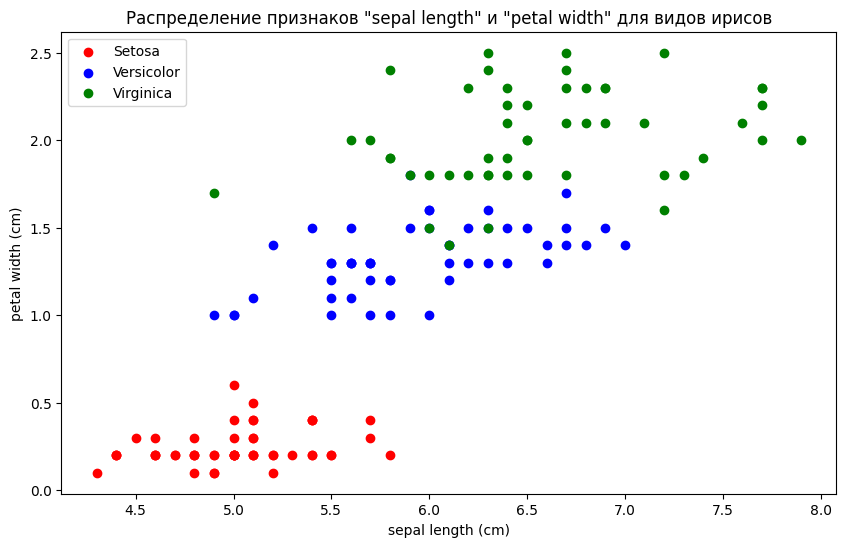

In [24]:
import matplotlib.pyplot as plt

# Создаем цветовую карту для видов ирисов
colors = ['red', 'blue', 'green']

# Создаем график
plt.figure(figsize=(10, 6))

# Разбиваем данные по видам ирисов и строим точки для каждого вида
for i in range(3):
    plt.scatter(X_selected[y == i]['sepal length (cm)'], X_selected[y == i]['petal width (cm)'],
                color=colors[i], label=f'Iris {i}')

# Настройка осей и меток
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Распределение признаков "sepal length" и "petal width" для видов ирисов')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

# Отображаем график
plt.show()


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [26]:
from sklearn.model_selection import train_test_split

# Разбиваем данные на обучающий (70%) и тестовый (30%) наборы
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Выводим размеры обучающего и тестового наборов
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (105, 2)
Размер тестового набора: (45, 2)


#### 1.2. Обучите модель KNN на 50 соседях

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем модель KNN с 50 соседями
knn = KNeighborsClassifier(n_neighbors=50)

# Обучаем модель на обучающем наборе данных
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50)

#### 1.3. Проверьте качество работы модели

In [28]:
from sklearn.metrics import accuracy_score

# Получаем предсказания модели для тестового набора
y_pred = knn.predict(X_test)

# Вычисляем точность классификации
accuracy = accuracy_score(y_test, y_pred)

# Выводим точность
print("Точность модели KNN на тестовом наборе:", accuracy)


Точность модели KNN на тестовом наборе: 0.8888888888888888


#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [29]:
from sklearn.metrics import pairwise_distances

# Выбираем один случайный тестовый объект
random_test_object = X_test.sample(n=1, random_state=42)

# Вычисляем расстояния от выбранного тестового объекта до всех объектов обучающего набора
distances = pairwise_distances(random_test_object, X_train, metric='euclidean')

# Выводим расстояния
print("Расстояния от случайного тестового объекта до объектов обучающего набора:")
print(distances)


Расстояния от случайного тестового объекта до объектов обучающего набора:
[[0.9486833  1.78044938 2.0808652  1.91049732 3.12409987 1.3
  3.12409987 1.45602198 0.14142136 3.14006369 1.08166538 0.1
  0.28284271 0.31622777 0.92195445 2.02484567 0.41231056 0.2236068
  0.41231056 1.26491106 0.14142136 1.2083046  3.26496554 0.60827625
  1.56204994 1.96468827 0.31622777 1.87882942 1.8973666  1.20415946
  1.41421356 2.41660919 1.23693169 0.36055513 0.92195445 2.16333077
  0.2236068  0.2236068  1.04403065 2.19317122 0.31622777 2.37697286
  0.2236068  0.53851648 1.83847763 1.00498756 2.78028775 1.7
  1.58113883 3.33016516 1.23693169 0.80622577 0.9        1.61245155
  2.62488095 0.60827625 0.2236068  0.80622577 1.78044938 2.54950976
  0.63245553 2.56124969 2.64007576 0.50990195 1.58113883 1.91049732
  1.97230829 2.22036033 2.50599282 0.14142136 2.62488095 1.56524758
  2.30217289 1.02956301 1.3        1.58113883 0.72801099 1.84390889
  1.14017543 0.14142136 1.26491106 2.70185122 2.5        0.31622

#### 1.5. Выберите топ  k  соседей


In [32]:
import numpy as np

# Задаем количество ближайших соседей, которых мы хотим выбрать (например, k=50)
k = 50

# Используем argsort для получения индексов соседей, отсортированных по возрастанию расстояний
neighbor_indices = np.argsort(distances[0])

# Выбираем первые k индексов, исключая сам объект
k_neighbors = neighbor_indices[1:k+1]  # Исключаем сам объект (его индекс 0)

# Выводим индексы ближайших соседей
print(f"Индексы ближайших {k} соседей:", k_neighbors)


Индексы ближайших 50 соседей: [ 20   8  69  79  56  36  99  37  17  42  12  87  26  40  89  83  13  33
  16  18  63  43  23  55 102  60  76  57  51  52  34  14  84   0  45  73
  38  10  78  29  21  32  50 103  80  19  93   5  74  30]


#### 1.6. Выведите финальное предсказание для этого объекта

In [33]:
from collections import Counter

# Получаем метки классов ближайших соседей
neighbor_labels = y_train[k_neighbors]

# Считаем частоту каждой метки класса
label_counts = Counter(neighbor_labels)

# Определяем класс с наибольшей частотой (наиболее популярный класс среди соседей)
final_prediction = label_counts.most_common(1)[0][0]

# Выводим финальное предсказание
print("Финальное предсказание для выбранного тестового объекта:", final_prediction)


Финальное предсказание для выбранного тестового объекта: 0


#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [34]:
# Предсказываем класс для выбранного тестового объекта с использованием модели KNN
knn_prediction = knn.predict(random_test_object)

# Фактическое целевое значение для выбранного тестового объекта
actual_label = y_test[X_test.index.isin(random_test_object.index)][0]

# Выводим фактическое значение и предсказание
print("Фактическое целевое значение:", actual_label)
print("Предсказание модели KNN:", knn_prediction)


Фактическое целевое значение: 0
Предсказание модели KNN: [0]


#### 1.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

- Синие точки представляют точки из обучающего набора данных.
- Зеленые звездочки обозначают выбранный тестовый объект.
- Красные точки представляют ближайших соседей этого тестового объекта.

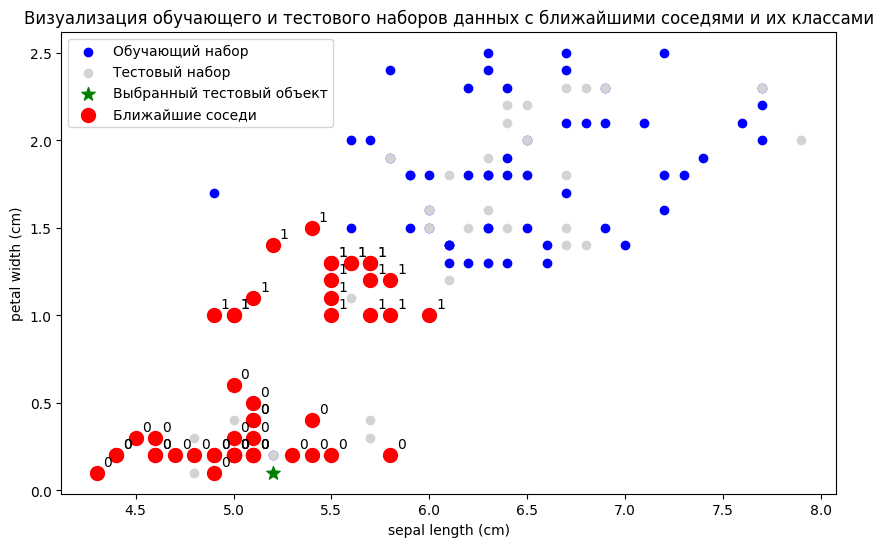

In [47]:
import matplotlib.pyplot as plt

# Создаем график
plt.figure(figsize=(10, 6))

# Рисуем точки обучающего набора данных
plt.scatter(X_train['sepal length (cm)'], X_train['petal width (cm)'], color='blue', label='Обучающий набор')

# Рисуем точки тестового набора данных
plt.scatter(X_test['sepal length (cm)'], X_test['petal width (cm)'], color='lightgray', label='Тестовый набор')

# Рисуем выбранный тестовый объект
plt.scatter(random_test_object['sepal length (cm)'], random_test_object['petal width (cm)'],
            c='g', marker='*', s=100, label='Выбранный тестовый объект')

# Рисуем ближайших соседей для выбранного тестового объекта
for neighbor_index in k_neighbors:
    neighbor_values = X_train.iloc[neighbor_index]
    plt.scatter(neighbor_values['sepal length (cm)'], neighbor_values['petal width (cm)'],
                c='r', marker='o', s=100)
    # Добавляем метку класса рядом с маркером
    plt.annotate(str(y_train[neighbor_index]), (neighbor_values['sepal length (cm)'], neighbor_values['petal width (cm)']),
                 xytext=(5, 5), textcoords='offset points')

# Настройка осей и меток
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Визуализация обучающего и тестового наборов данных с ближайшими соседями и их классами')

# Добавляем легенду
plt.legend(['Обучающий набор', 'Тестовый набор', 'Выбранный тестовый объект', 'Ближайшие соседи'])

# Отображаем график
plt.show()


### 2. Weighted KNN

#### 2.1. Обучите модель "взвешенный KNN" по дистанции

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем модель KNN с взвешенными расстояниями
knn_weighted = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Обучаем модель на обучающих данных
knn_weighted.fit(X_train[['sepal length (cm)', 'petal width (cm)']], y_train)

# Делаем предсказания для тестовых данных
y_pred_weighted = knn_weighted.predict(X_test[['sepal length (cm)', 'petal width (cm)']])



Accuracy (взвешенный KNN): 0.93


#### 2.2. Проверьте качество работы модели


In [49]:
# Оцениваем качество модели
accuracy_weighted = knn_weighted.score(X_test[['sepal length (cm)', 'petal width (cm)']], y_test)
print(f"Accuracy (взвешенный KNN): {accuracy_weighted:.2f}")


Accuracy (взвешенный KNN): 0.93


#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [50]:
from sklearn.metrics import pairwise_distances

# Выбираем один случайный тестовый объект
random_test_object = random_test_object 

# Вычисляем расстояния от выбранного тестового объекта до всех объектов обучающего набора
distances = pairwise_distances(random_test_object, X_train, metric='euclidean')

# Выводим расстояния
print("Расстояния от случайного тестового объекта до объектов обучающего набора:")
print(distances)



Расстояния от случайного тестового объекта до объектов обучающего набора:
[[0.9486833  1.78044938 2.0808652  1.91049732 3.12409987 1.3
  3.12409987 1.45602198 0.14142136 3.14006369 1.08166538 0.1
  0.28284271 0.31622777 0.92195445 2.02484567 0.41231056 0.2236068
  0.41231056 1.26491106 0.14142136 1.2083046  3.26496554 0.60827625
  1.56204994 1.96468827 0.31622777 1.87882942 1.8973666  1.20415946
  1.41421356 2.41660919 1.23693169 0.36055513 0.92195445 2.16333077
  0.2236068  0.2236068  1.04403065 2.19317122 0.31622777 2.37697286
  0.2236068  0.53851648 1.83847763 1.00498756 2.78028775 1.7
  1.58113883 3.33016516 1.23693169 0.80622577 0.9        1.61245155
  2.62488095 0.60827625 0.2236068  0.80622577 1.78044938 2.54950976
  0.63245553 2.56124969 2.64007576 0.50990195 1.58113883 1.91049732
  1.97230829 2.22036033 2.50599282 0.14142136 2.62488095 1.56524758
  2.30217289 1.02956301 1.3        1.58113883 0.72801099 1.84390889
  1.14017543 0.14142136 1.26491106 2.70185122 2.5        0.31622

#### 2.4. Выберите топ  k  соседей


In [57]:
import numpy as np

# Задаем количество ближайших соседей, которых мы хотим выбрать (например, k=50)
k = 12

# Используем argsort для получения индексов соседей, отсортированных по возрастанию расстояний
neighbor_indices = np.argsort(distances[0])

# Выбираем первые k индексов, исключая сам объект
k_neighbors = neighbor_indices[1:k+1]  # Исключаем сам объект (его индекс 0)

# Выводим индексы ближайших соседей
print(f"Индексы ближайших {k} соседей:", k_neighbors)

print("Расстояния до ближайших соседей:")
for i, neighbor_index in enumerate(k_neighbors):
    distance = distances[0, neighbor_index]
    print(f"Сосед {i + 1} (Индекс {neighbor_index}): {distance:.2f}")


Индексы ближайших 12 соседей: [20  8 69 79 56 36 99 37 17 42 12 87]
Расстояния до ближайших соседей:
Сосед 1 (Индекс 20): 0.14
Сосед 2 (Индекс 8): 0.14
Сосед 3 (Индекс 69): 0.14
Сосед 4 (Индекс 79): 0.14
Сосед 5 (Индекс 56): 0.22
Сосед 6 (Индекс 36): 0.22
Сосед 7 (Индекс 99): 0.22
Сосед 8 (Индекс 37): 0.22
Сосед 9 (Индекс 17): 0.22
Сосед 10 (Индекс 42): 0.22
Сосед 11 (Индекс 12): 0.28
Сосед 12 (Индекс 87): 0.30


#### 2.5. Рассчитайте вес для каждого соседа

In [58]:
# Выбираем ближайших k соседей
k_neighbors_distances = distances[0, k_neighbors]

# Рассчитываем веса для каждого соседа
weights = 1 / k_neighbors_distances

# Печатаем веса
print("Веса для ближайших соседей:")
for i, weight in enumerate(weights):
    print(f"Сосед {i + 1}: {weight:.2f}")

Веса для ближайших соседей:
Сосед 1: 7.07
Сосед 2: 7.07
Сосед 3: 7.07
Сосед 4: 7.07
Сосед 5: 4.47
Сосед 6: 4.47
Сосед 7: 4.47
Сосед 8: 4.47
Сосед 9: 4.47
Сосед 10: 4.47
Сосед 11: 3.54
Сосед 12: 3.33


#### 2.6. Выведите финальное предсказание для этого объекта

In [59]:
# Ваш код здесь# Считаем взвешенное среднее для предсказания класса
weighted_prediction = np.average(y_train[k_neighbors], weights=weights)

# Округляем предсказание до целого числа (если требуется)
final_prediction = round(weighted_prediction)

print(f"Финальное предсказание: {final_prediction}")


Финальное предсказание: 0


#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

In [ ]:
# Ваш код здесь


## 3. Еще одна задача классификации

### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [16]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


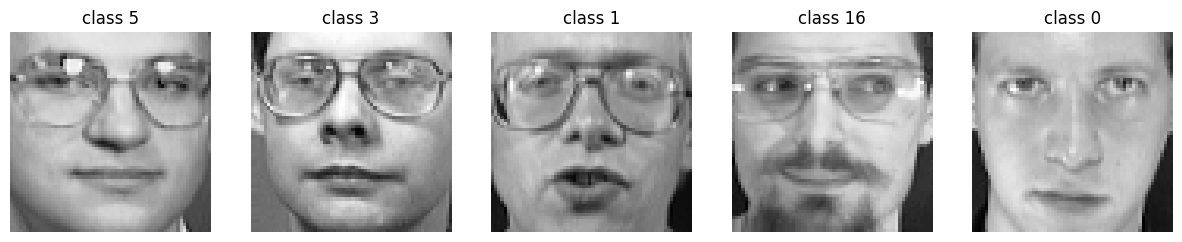

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [5]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn

#### 3.1.1. Разбейте данные на обучение и тест

In [29]:
from sklearn.model_selection import train_test_split

# Разбиваем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train - матрица признаков для обучения
# y_train - вектор целевых значений для обучения
# X_test - матрица признаков для тестирования
# y_test - вектор целевых значений для тестирования


#### 3.1.2. Обучите модель KNN на 50 соседях

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем модель KNN с 50 соседями
knn_classifier = KNeighborsClassifier(n_neighbors=50)

# Обучаем модель на обучающих данных
knn_classifier.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=50)

### 3.2. Weighted KNN

#### 3.2.1. Обучите модель взвешенный KNN по дистанции

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем модель KNN с 50 соседями и весами по расстоянию
knn_weighted_classifier = KNeighborsClassifier(n_neighbors=50, weights='distance')

# Обучаем модель на обучающих данных
knn_weighted_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 3.2.2. Проверьте качество работы модели


In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Предсказываем метки для тестовых данных
y_pred = knn_weighted_classifier.predict(X_test)

# Вычисляем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели KNN с 50 соседями: {accuracy:.2f}')

# Вычисляем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print('Матрица ошибок:')
print(conf_matrix)

# Выводим отчет о классификации
class_report = classification_report(y_test, y_pred)
print('Отчет о классификации:')
print(class_report)

Точность модели KNN с 50 соседями: 0.54
Матрица ошибок:
[[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Отчет о классификации:
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       0.29      1.00      0.44         2
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       0.00      0.00      0.00         6
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       0.12      1.00      0.22 

C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3. Custom Weighted KNN

#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)

In [34]:
import numpy as np

def custom_distance_weight(distances):
    """
    Пользовательская функция подсчета весов на основе расстояния.

    Параметры:
    distances (numpy.ndarray): Массив расстояний между тестовым экземпляром и его k ближайшими соседями.

    Возвращает:
    weights (numpy.ndarray): Массив весов, вычисленных на основе расстояний.
    """
    epsilon = 1e-6  # Малая константа, чтобы избежать деления на ноль
    weights = 1.0 / (distances ** 2 + epsilon)  # Взвешивание обратно пропорционально квадрату расстояния
    return weights


#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем модель KNN с 50 соседями и пользовательской функцией взвешивания
knn_custom_weighted = KNeighborsClassifier(n_neighbors=50, weights=custom_distance_weight)

# Обучаем модель на обучающих данных
knn_custom_weighted.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50,
                     weights=<function custom_distance_weight at 0x000001F76E6E5900>)

#### 3.3.3. Проверьте качество работы модели


In [37]:
y_pred_custom_weighted = knn_custom_weighted.predict(X_test)
accuracy_custom_weighted = accuracy_score(y_test, y_pred_custom_weighted)
print(f'Точность пользовательской модели KNN с весами: {accuracy_custom_weighted:.2f}')

Точность пользовательской модели KNN с весами: 0.66


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [38]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [39]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк

In [40]:
X_subset = X[['MedInc']].iloc[:1000]

### Отрисуйте данные на графике

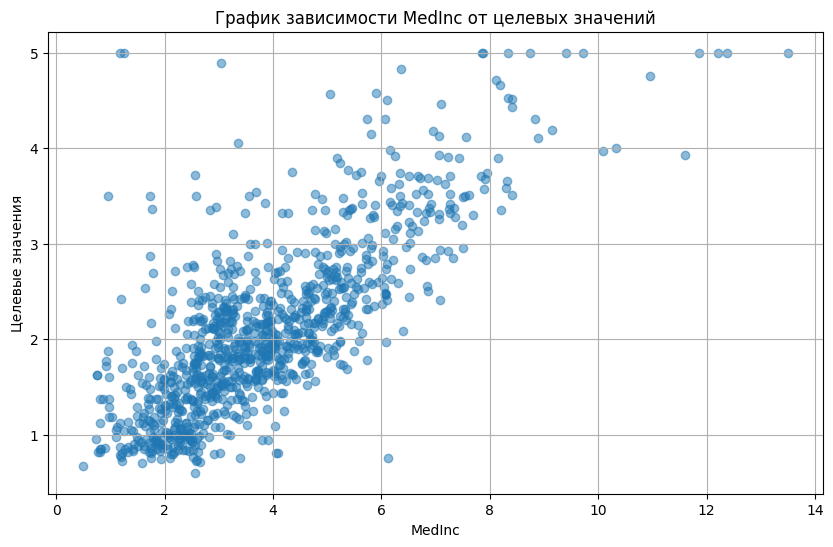

In [22]:
import matplotlib.pyplot as plt

# Извлекаем значения признака "MedInc" и целевых значений для первых 1000 строк
MedInc_values = X_subset['MedInc'].values
y_values = y[:1000]

# Создаем график
plt.figure(figsize=(10, 6))
plt.scatter(MedInc_values, y_values, alpha=0.5)
plt.title('График зависимости MedInc от целевых значений')
plt.xlabel('MedInc')
plt.ylabel('Целевые значения')
plt.grid(True)
plt.show()

### 4. KNN из sklearn

#### 4.1. Разбейте данные на обучение и тест

In [41]:
from sklearn.model_selection import train_test_split

# Разбиваем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_subset, y[:1000], test_size=0.2, random_state=42)

# X_train - матрица признаков для обучения
# y_train - вектор целевых значений для обучения
# X_test - матрица признаков для тестирования
# y_test - вектор целевых значений для тестирования

#### 4.2. Обучите модель KNN на 100 соседях


In [53]:
from sklearn.neighbors import KNeighborsRegressor

# Создаем модель KNN с 100 соседями
knn_regressor = KNeighborsRegressor(n_neighbors=100)

# Обучаем модель на обучающих данных
knn_regressor.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=100)

#### 4.3. Проверьте качество работы модели


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Предсказываем целевые значения для тестовых данных
y_pred = knn_regressor.predict(X_test)

# Оцениваем производительность модели с помощью MAE и MSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')


Среднеквадратичная ошибка (MSE): 0.25
Средняя абсолютная ошибка (MAE): 0.40


#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [50]:
from sklearn.metrics import pairwise_distances

# Преобразуем X_train и X_test (DataFrame) в массивы NumPy
X_train_array = X_train.values
X_test_array = X_test.values

# Выберем случайный тестовый объект из X_test_array
random_test_sample = X_test_array[np.random.randint(0, len(X_test_array))]

# Вычисляем расстояния между случайным тестовым объектом и всеми объектами обучения
distances = pairwise_distances([random_test_sample], X_train_array, metric='euclidean')

# distances содержит расстояния от случайного тестового объекта до всех объектов обучения

# Выводим расстояния
print("Расстояния до всех объектов обучения:")
print(distances)

Расстояния до всех объектов обучения:
[[1.65560000e+00 1.91700000e+00 9.22500000e-01 1.76080000e+00
  1.04440000e+00 1.90660000e+00 1.20020000e+00 1.88770000e+00
  2.03630000e+00 6.89500000e-01 2.17640000e+00 3.71180000e+00
  2.03820000e+00 1.35880000e+00 7.33000000e-01 9.40300000e-01
  6.27100000e-01 1.26300000e+00 1.49720000e+00 9.31000000e-02
  1.45180000e+00 8.95500000e-01 1.72460000e+00 1.56810000e+00
  9.52400000e-01 3.91430000e+00 3.69900000e-01 1.90560000e+00
  2.04490000e+00 7.98700000e-01 1.27410000e+00 6.43300000e-01
  7.36000000e-01 1.45900000e-01 1.96810000e+00 1.38160000e+00
  5.05600000e-01 2.97010000e+00 1.24310000e+00 8.65500000e-01
  2.30000000e+00 1.74220000e+00 9.03730000e+00 8.27300000e-01
  1.63750000e+00 5.63200000e-01 5.73600000e-01 2.23200000e+00
  1.53430000e+00 7.74000000e-02 1.82230000e+00 2.38080000e+00
  4.46400000e-01 3.41680000e+00 1.82440000e+00 9.97500000e-01
  2.53990000e+00 2.09280000e+00 5.06140000e+00 6.93700000e-01
  8.54300000e-01 5.16300000e-01 

#### 4.5. Выберите топ  k  соседей


In [51]:
# Задайте количество ближайших соседей, которых вы хотите выбрать
k = 5  # Пример: выберем 5 ближайших соседей

# Сортируем расстояния и получаем индексы k ближайших соседей
k_nearest_indices = np.argsort(distances[0])[:k]

# Теперь k_nearest_indices содержит индексы k ближайших соседей

# Выводим индексы k ближайших соседей
print(f"Индексы {k} ближайших соседей:")
print(k_nearest_indices)

Индексы 5 ближайших соседей:
[111 564 629 772 146]


#### 4.6. Выведите финальное предсказание для этого объекта

In [52]:
# Получаем целевые значения (результаты) для ближайших соседей
k_nearest_targets = y_train[k_nearest_indices]

# Усредняем целевые значения для ближайших соседей
final_prediction = np.mean(k_nearest_targets)

# Выводим финальное предсказание
print(f"Финальное предсказание для объекта: {final_prediction:.2f}")


Финальное предсказание для объекта: 2.50


#### 4.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [54]:
# Предсказание модели KNN (значение, вычисленное моделью)
knn_model_prediction = knn_regressor.predict([random_test_sample])[0]

# Финальное предсказание на основе KNN (усредненное значение из ближайших соседей)
final_prediction = np.mean(k_nearest_targets)

# Настоящее целевое значение для выбранного объекта (замените на реальное значение)
true_target_value = y_test[np.random.randint(0, len(X_test))]

# Выводим настоящее целевое значение, предсказание модели и финальное предсказание
print(f"Настоящее целевое значение: {true_target_value:.2f}")
print(f"Предсказание модели KNN: {knn_model_prediction:.2f}")
print(f"Финальное предсказание на основе KNN: {final_prediction:.2f}")

# Вычисляем абсолютную разницу между настоящим и предсказанными значениями
abs_error_model = np.abs(true_target_value - knn_model_prediction)
abs_error_final = np.abs(true_target_value - final_prediction)

print(f"Абсолютная ошибка модели KNN: {abs_error_model:.2f}")
print(f"Абсолютная ошибка финального предсказания: {abs_error_final:.2f}")

Настоящее целевое значение: 2.16
Предсказание модели KNN: 1.99
Финальное предсказание на основе KNN: 2.50
Абсолютная ошибка модели KNN: 0.17
Абсолютная ошибка финального предсказания: 0.34


C:\Users\Evgenie\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 4.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

In [68]:
k_nearest_indices = np.argsort(distances)[:k]

In [69]:
k_nearest_indices.shape

(1, 800)

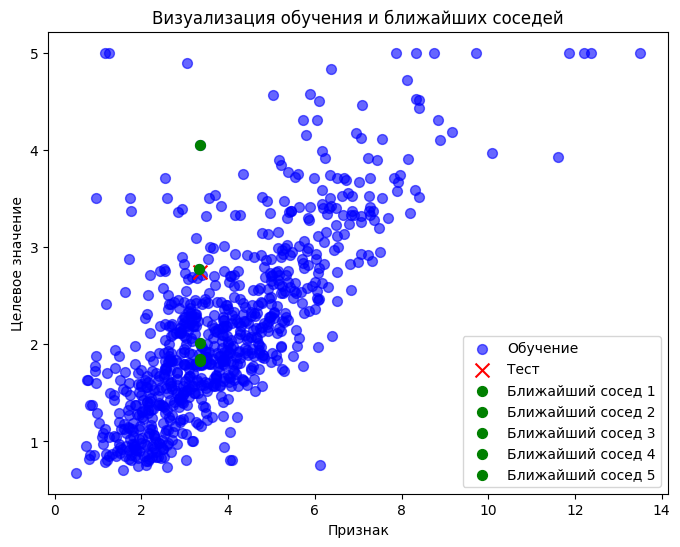

In [72]:
import matplotlib.pyplot as plt

# Задайте количество ближайших соседей, которых вы хотите отобразить
k = 5  # Пример: отобразим 5 ближайших соседей

# Получите индексы k ближайших соседей для случайного тестового объекта
k_nearest_indices = np.argsort(distances)[:k]

# Создаем график
plt.figure(figsize=(8, 6))

# Отобразим точки обучения на основе единственного признака
plt.scatter(X_train_array[:, 0], y_train, c='blue', label='Обучение', s=50, alpha=0.6)

# Отобразим случайный тестовый объект на основе единственного признака
plt.scatter(random_test_sample[0], y_test[np.random.randint(0, len(X_test))], c='red', marker='x', s=100, label='Тест')

# Отобразим ближайших соседей на основе единственного признака
for i in range(k):
    plt.scatter(X_train_array[k_nearest_indices[0,i], 0], y_train[k_nearest_indices[0,i]], c='green', marker='o', s=50, label=f'Ближайший сосед {i+1}')


# Добавим метки классов
plt.legend()
plt.xlabel('Признак')
plt.ylabel('Целевое значение')
plt.title('Визуализация обучения и ближайших соседей')
plt.show()


### 5. Weighted KNN

#### 5.1. Обучите модель взвешенный KNN по дистанции

In [74]:
from sklearn.neighbors import KNeighborsRegressor

# Задайте количество соседей (в данном случае, 5)
k_neighbors = 5


weighted_knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors, weights='distance')


weighted_knn_regressor.fit(X_train, y_train)

y_pred_weighted_knn = weighted_knn_regressor.predict(X_test)


#### 5.2. Проверьте качество работы модели


In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Вычислите MAE, MSE и R^2
mae = mean_absolute_error(y_test, y_pred_weighted_knn)
mse = mean_squared_error(y_test, y_pred_weighted_knn)
r2 = r2_score(y_test, y_pred_weighted_knn)

# Выведите метрики
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Средняя квадратичная ошибка (MSE): {mse:.2f}')
print(f'Коэффициент детерминации (R^2): {r2:.2f}')


Средняя абсолютная ошибка (MAE): 0.48
Средняя квадратичная ошибка (MSE): 0.37
Коэффициент детерминации (R^2): 0.49


#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [76]:
# Вычисляем расстояния между случайным тестовым объектом и всеми объектами обучения
distances = pairwise_distances([random_test_sample], X_train_array, metric='euclidean')

# distances содержит расстояния от случайного тестового объекта до всех объектов обучения

# Выводим расстояния
print("Расстояния до всех объектов обучения:")
print(distances)


Расстояния до всех объектов обучения:
[[1.65560000e+00 1.91700000e+00 9.22500000e-01 1.76080000e+00
  1.04440000e+00 1.90660000e+00 1.20020000e+00 1.88770000e+00
  2.03630000e+00 6.89500000e-01 2.17640000e+00 3.71180000e+00
  2.03820000e+00 1.35880000e+00 7.33000000e-01 9.40300000e-01
  6.27100000e-01 1.26300000e+00 1.49720000e+00 9.31000000e-02
  1.45180000e+00 8.95500000e-01 1.72460000e+00 1.56810000e+00
  9.52400000e-01 3.91430000e+00 3.69900000e-01 1.90560000e+00
  2.04490000e+00 7.98700000e-01 1.27410000e+00 6.43300000e-01
  7.36000000e-01 1.45900000e-01 1.96810000e+00 1.38160000e+00
  5.05600000e-01 2.97010000e+00 1.24310000e+00 8.65500000e-01
  2.30000000e+00 1.74220000e+00 9.03730000e+00 8.27300000e-01
  1.63750000e+00 5.63200000e-01 5.73600000e-01 2.23200000e+00
  1.53430000e+00 7.74000000e-02 1.82230000e+00 2.38080000e+00
  4.46400000e-01 3.41680000e+00 1.82440000e+00 9.97500000e-01
  2.53990000e+00 2.09280000e+00 5.06140000e+00 6.93700000e-01
  8.54300000e-01 5.16300000e-01 

#### 5.4. Выберите топ  k  соседей


In [77]:
# Задайте количество ближайших соседей, которых вы хотите выбрать
k = 5  # Пример: выберем 5 ближайших соседей

# Сортируем расстояния и получаем индексы k ближайших соседей
k_nearest_indices = np.argsort(distances[0])[:k]

# Теперь k_nearest_indices содержит индексы k ближайших соседей

# Выводим индексы k ближайших соседей
print(f"Индексы {k} ближайших соседей:")
print(k_nearest_indices)


Индексы 5 ближайших соседей:
[111 564 629 772 146]


#### 5.5. Рассчитайте вес для каждого соседа

In [78]:
# Вычисляем веса на основе обратного расстояния (чем меньше расстояние, тем больший вес)
weights = 1 / distances[0][k_nearest_indices]

# Теперь weights содержит веса для каждого из k ближайших соседей

# Выводим веса
print(f"Веса для {k} ближайших соседей:")
print(weights)


Веса для 5 ближайших соседей:
[1428.57142644  212.76595744  208.33333333  102.04081633   71.42857143]


#### 5.6. Выведите финальное предсказание для этого объекта

In [81]:
# Получаем целевые значения для выбранных ближайших соседей
neighbor_targets = y_train[k_nearest_indices]

# Вычисляем финальное предсказание, усредняя целевые значения с учетом весов
final_prediction = np.sum(neighbor_targets * weights) / np.sum(weights)

# Выводим финальное предсказание
print(f"Финальное предсказание для объекта: {final_prediction}")


Финальное предсказание для объекта: 2.086120449359055


## 6. Еще одна задача регрессии

### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.

In [121]:
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [122]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.

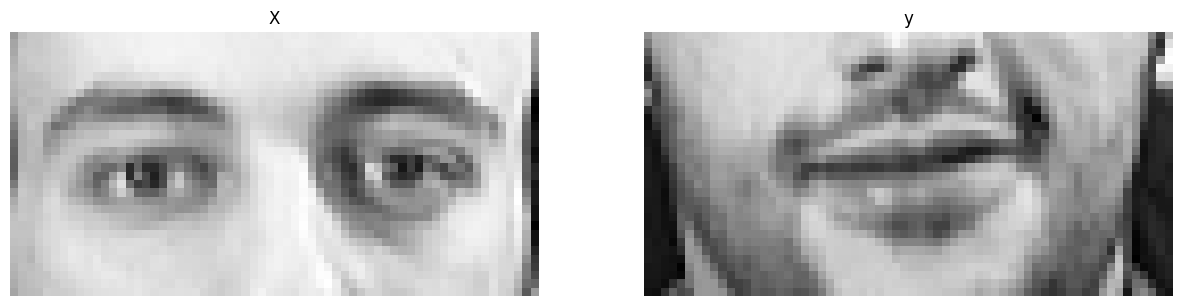

In [123]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях

In [124]:
from sklearn.neighbors import KNeighborsRegressor

# Создаем модель KNN с 100 соседями
knn_model = KNeighborsRegressor(n_neighbors=100)

# Обучаем модель на верхней части лица (X_train и y_train)
knn_model.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [125]:
pred_test = {'knn': None,
             'weighted_knn': None,
             'weighted_knn_custom': None}

In [126]:
# Предсказываем нижнюю часть лица на тестовых данных
y_pred_knn = knn_model.predict(X_test)

# Записываем предсказания в словарь pred_test
pred_test['knn'] = y_pred_knn


In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Предсказываем нижнюю часть лица на тестовых данных
y_pred_knn = knn_model.predict(X_test)

# Вычисляем MSE и MAE
mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)

print(f'Среднеквадратичная ошибка (MSE) модели KNN: {mse:.2f}')
print(f'Средняя абсолютная ошибка (MAE) модели KNN: {mae:.2f}')

Среднеквадратичная ошибка (MSE) модели KNN: 0.02
Средняя абсолютная ошибка (MAE) модели KNN: 0.10


#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях

In [128]:
from sklearn.neighbors import KNeighborsRegressor

# Создаем модель KNN с весами по расстоянию и 100 соседями
weighted_knn_model = KNeighborsRegressor(n_neighbors=100, weights='distance')

# Обучаем модель на верхней части лица (X_train и y_train_bottom)
weighted_knn_model.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [157]:
# Предсказываем нижнюю часть лица на тестовых данных
y_pred_knn_weighted = weighted_knn_model.predict(X_test)

# Записываем предсказания в словарь pred_test
pred_test['weighted_knn'] = y_pred_knn_weighted


In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Предсказываем нижнюю часть лица на тестовых данных
y_pred_knn_weighted = weighted_knn_model.predict(X_test)

# Вычисляем MSE и MAE
mse = mean_squared_error(y_test, y_pred_knn_weighted)
mae = mean_absolute_error(y_test, y_pred_knn_weighted)

print(f'Среднеквадратичная ошибка (MSE) модели KNN: {mse:.2f}')
print(f'Средняя абсолютная ошибка (MAE) модели KNN: {mae:.2f}')

Среднеквадратичная ошибка (MSE) модели KNN: 0.02
Средняя абсолютная ошибка (MAE) модели KNN: 0.10


#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [139]:
import numpy as np

def custom_distance_weight(distances):
    """
    Пользовательская функция подсчета весов на основе расстояния.

    Параметры:
    distances (numpy.ndarray): Массив расстояний между тестовым экземпляром и его k ближайшими соседями.

    Возвращает:
    weights (numpy.ndarray): Массив весов, вычисленных на основе расстояний.
    """
    epsilon = 1e-6  # Малая константа, чтобы избежать деления на ноль
    weights = 1.0 / (distances ** 2 + epsilon)  # Взвешивание обратно пропорционально квадрату расстояния
    return weights


#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях

In [140]:
custom_weighted_knn_model = KNeighborsRegressor(n_neighbors=100, weights=custom_distance_weight)

custom_weighted_knn_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100,
                    weights=<function custom_distance_weight at 0x000001F76FF743A0>)

#### 6.7. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn_custom.


In [158]:

y_pred_custom_weighted_knn = custom_weighted_knn_model.predict(X_test)

pred_test['weighted_knn_custom'] = y_pred_custom_weighted_knn


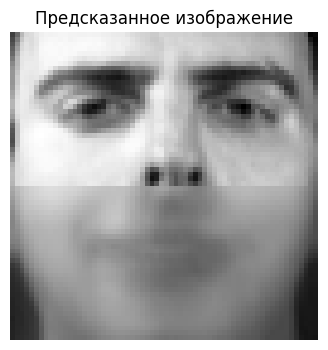

In [159]:
import matplotlib.pyplot as plt

# Вычисляем предсказания для нижней половины лица на тестовых данных
y_pred_custom_weighted_knn = custom_weighted_knn_model.predict(X_test)

# Объединяем верхнюю и нижнюю половины лица для тестовых данных
full_face_predictions = np.hstack((X_test, y_pred_custom_weighted_knn))

# Визуализируем одно из предсказанных изображений
sample_index = 0  # Индекс изображения для отображения (можете выбрать другой индекс)
sample_image = full_face_predictions[sample_index].reshape((64, 64))  # Преобразуем в 2D изображение

pred_test['weighted_knn_custom'] =  y_pred_custom_weighted_knn

# Выводим предсказанное изображение
plt.figure(figsize=(4, 4))
plt.imshow(sample_image, cmap='gray')
plt.axis('off')
plt.title('Предсказанное изображение')
plt.show()

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Предсказываем нижнюю часть лица на тестовых данных
y_pred_custom_weighted_knn = custom_weighted_knn_model.predict(X_test)


# Вычисляем MSE и MAE
mse_custom_weighted_knn = mean_squared_error(y_test, y_pred_custom_weighted_knn)
mae_custom_weighted_knn = mean_absolute_error(y_test, y_pred_custom_weighted_knn)

# Выводим результаты
print(f'Среднеквадратичная ошибка (MSE) модели KNN с пользовательской функцией для весов: {mse_custom_weighted_knn:.2f}')
print(f'Средняя абсолютная ошибка (MAE) модели KNN с пользовательской функцией для весов: {mae_custom_weighted_knn:.2f}')

Среднеквадратичная ошибка (MSE) модели KNN с пользовательской функцией для весов: 0.01
Средняя абсолютная ошибка (MAE) модели KNN с пользовательской функцией для весов: 0.09


А сейчас отрисуем все предсказания.

In [161]:
ESTIMATORS = {'knn': pred_test['knn'],
              'weighted_knn': pred_test['weighted_knn'],
              'weighted_knn_custom': pred_test['weighted_knn_custom']}

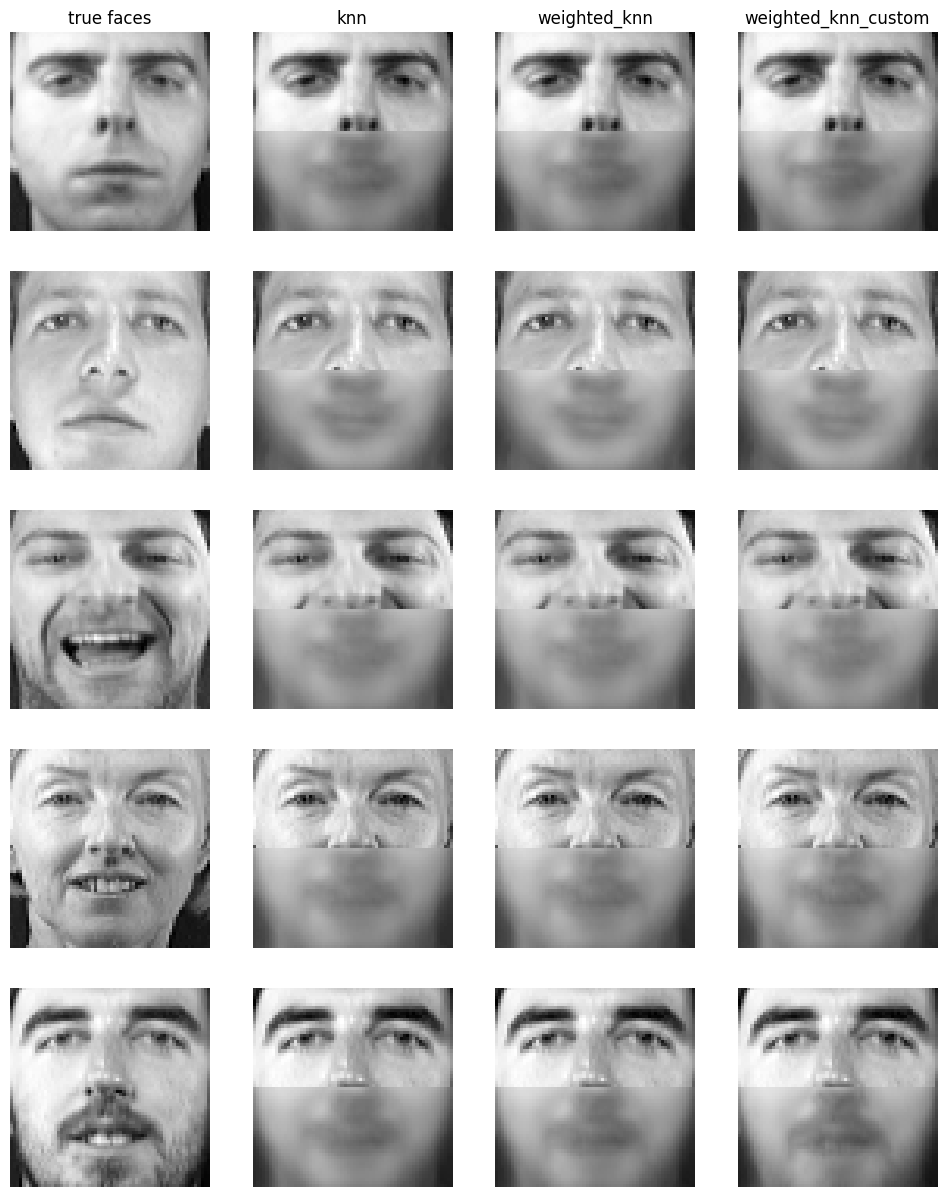

In [162]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

#### 7*. Подберите лучшие гиперпараметры для модели, используя метод [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)

Примеры использования можно найти в технической документации, а также в следующих источниках:

[Пример 1](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/#vii_Model_fitting_with_K-cross_Validation_and_GridSearchCV)


[Пример 2](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv)

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Задайте список гиперпараметров, которые вы хотите перебрать
param_grid = {
    'n_neighbors': [2,3,5,7, 10,15, 20,25,30, 50, 100, 150, 200],  # Разные значения для количества соседей
    'weights': ['uniform', 'distance'],  # Разные значения для весов
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine', 'hamming'],
}


knn_model = KNeighborsRegressor()

#  объект GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучение GridSearchCV на данных
grid_search.fit(X_train, y_train)

#  лучшие гиперпараметры
best_params = grid_search.best_params_


print("Лучшие гиперпараметры:", best_params)

# лучшая модель
best_knn_model = grid_search.best_estimator_

# Оценка производительность лучшей модели на тестовых данных
y_pred_best = best_knn_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

#  оценку производительности
print(f'Среднеквадратичная ошибка (MSE) лучшей модели: {mse_best:.2f}')
print(f'Средняя абсолютная ошибка (MAE) лучшей модели: {mae_best:.2f}')


Лучшие гиперпараметры: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Среднеквадратичная ошибка (MSE) лучшей модели: 0.01
Средняя абсолютная ошибка (MAE) лучшей модели: 0.07


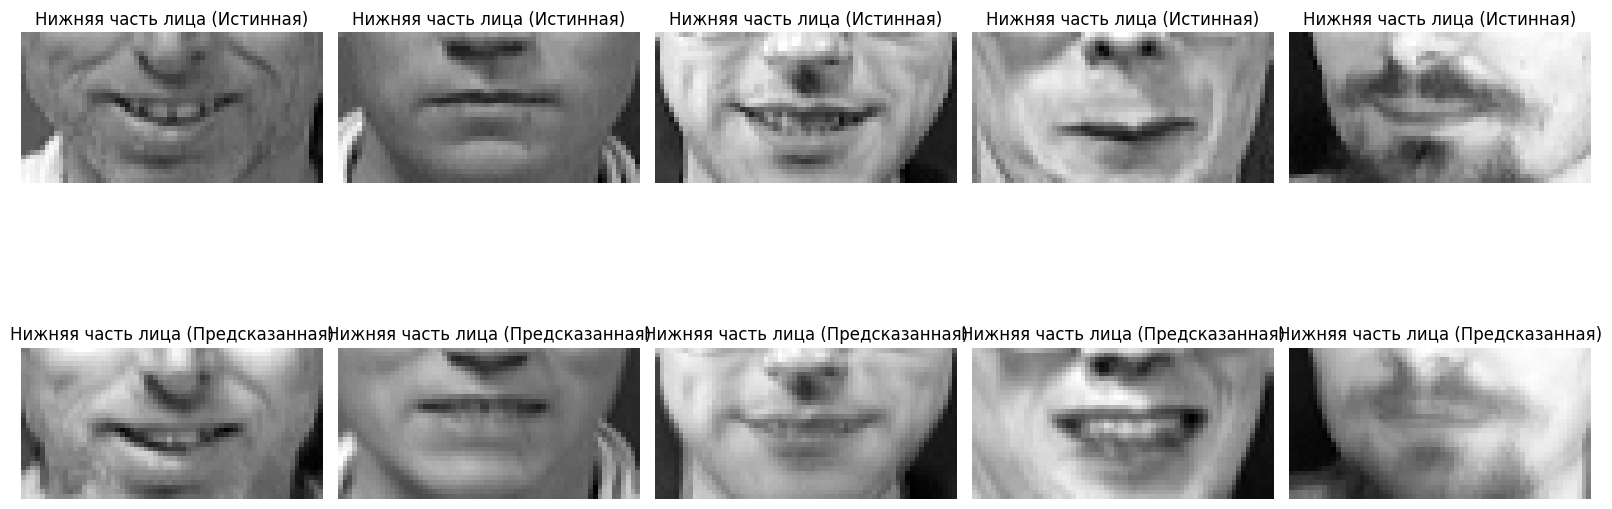

In [188]:
import matplotlib.pyplot as plt

# Получите предсказания лучшей модели
y_pred_best = best_knn_model.predict(X_test)

# Выберите 5 случайных индексов из тестовой выборки
random_test_indices = np.random.choice(X_test.shape[0], 5, replace=False)

# Отобразите оригинальные и предсказанные данные
plt.figure(figsize=(16, 10))
for i, index in enumerate(random_test_indices):
  #  original_upper = X_test[index].reshape(32, 64)  # Верхняя часть лица
    original_lower = y_test[index].reshape(32, 64)  # Нижняя часть лица
    predicted_lower = y_pred_best[index].reshape(32, 64)  # Предсказанная нижняя часть лица
    
   # plt.subplot(3, 5, i + 1)
   # plt.imshow(original_upper, cmap='gray')
   # plt.title("Верхняя часть лица")
   # plt.axis('off')

    plt.subplot(3, 5, i + 6)
    plt.imshow(original_lower, cmap='gray')
    plt.title("Нижняя часть лица (Истинная)")
    plt.axis('off')

    plt.subplot(3, 5, i + 11)
    plt.imshow(predicted_lower, cmap='gray')
    plt.title("Нижняя часть лица (Предсказанная)")
    plt.axis('off')

plt.tight_layout()
plt.show()

